# Kenali Sapinya
Anda memiliki 2 jenis gambar yaitu sapi tanpa background dan sapi dengan background.
Buatlah model pola sapi dengan gambar tanpa background. Kemudian gunakan pola tersebut untuk mendeteksi sapi dengan background. Gunakan interpolasi dan finite difference atau metode lain di dalam materi metode numerik.

Note:
1. Tidak boleh menggunakan library kecuali untuk membaca image
2. Algoritma Anda rancang sendiri dan implementasikan sendiri from scratch
3. Satu kelompok terdiri dari 4 orang.

In [1]:
import cv2
import matplotlib.pyplot as plt

## Menampilkan Gambar

In [2]:
def display_im(im1, im2,im3, title):
  f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
  ax1.imshow(im1, cmap='gray')
  ax1.set_title('Sapi 1')
  ax2.imshow(im2, cmap='gray')
  ax2.set_title('Sapi 2')
  ax3.imshow(im3, cmap='gray')
  ax3.set_title('Sapi 3')
  f.suptitle(title, fontsize=15)

def display_im2(im1, title):
  f, (ax1) = plt.subplots(1, 1, figsize=(14, 4))
  ax1.imshow(im1, cmap='gray')
  f.suptitle(title, fontsize=15)

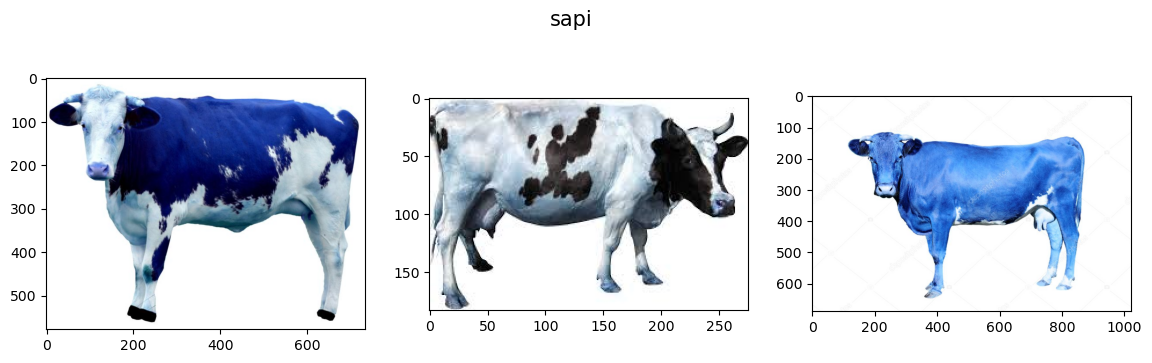

In [3]:
sapi_tanpa_bg1 = cv2.imread('./sapi1.jpg')
sapi_tanpa_bg2 = cv2.imread('./sapi2.jpeg')
sapi_tanpa_bg3 = cv2.imread('./sapi3.jpg')
sapi_dgn_bg = cv2.imread('./sapi_x.jpeg')
display_im(sapi_tanpa_bg1,sapi_tanpa_bg2,sapi_tanpa_bg3, title='sapi')

In [4]:
image1 = sapi_tanpa_bg1
image2 = sapi_tanpa_bg2
image3 = sapi_tanpa_bg3
image4 = sapi_dgn_bg


In [5]:
def get_shape(image):
    height = len(image)
    width = len(image[0])
    return height, width

def resize_image(image, new_width, new_height):
    height, width = get_shape(image)

    scale_x = width / new_width
    scale_y = height / new_height

    resized_image = [[0] * new_width for _ in range(new_height)]

    for y in range(new_height):
        for x in range(new_width):
            src_x = int(x * scale_x)
            src_y = int(y * scale_y)

            x1 = src_x
            x2 = min(x1 + 1, width - 1)
            y1 = src_y
            y2 = min(y1 + 1, height - 1)

            weight_x = src_x - x1
            weight_y = src_y - y1

            top_left = image[y1][x1]
            top_right = image[y1][x2]
            bottom_left = image[y2][x1]
            bottom_right = image[y2][x2]

            interpolated_pixel = [
                int((1 - weight_x) * (1 - weight_y) * top_left[0] +
                    weight_x * (1 - weight_y) * top_right[0] +
                    (1 - weight_x) * weight_y * bottom_left[0] +
                    weight_x * weight_y * bottom_right[0]),
                int((1 - weight_x) * (1 - weight_y) * top_left[1] +
                    weight_x * (1 - weight_y) * top_right[1] +
                    (1 - weight_x) * weight_y * bottom_left[1] +
                    weight_x * weight_y * bottom_right[1]),
                int((1 - weight_x) * (1 - weight_y) * top_left[2] +
                    weight_x * (1 - weight_y) * top_right[2] +
                    (1 - weight_x) * weight_y * bottom_left[2] +
                    weight_x * weight_y * bottom_right[2])
            ]

            resized_image[y][x] = interpolated_pixel

    return resized_image

new_width = 200
new_height = 150

resized_image1 = resize_image(sapi_tanpa_bg1, new_width, new_height)
resized_image2 = resize_image(sapi_tanpa_bg2, new_width, new_height)
resized_image3 = resize_image(sapi_tanpa_bg3, new_width, new_height)

## Deteksi Edge dengan Finite Difference

In [6]:
def get_shape(image):
    # assumes that array is symmetric
    return len(image), len(image[0])

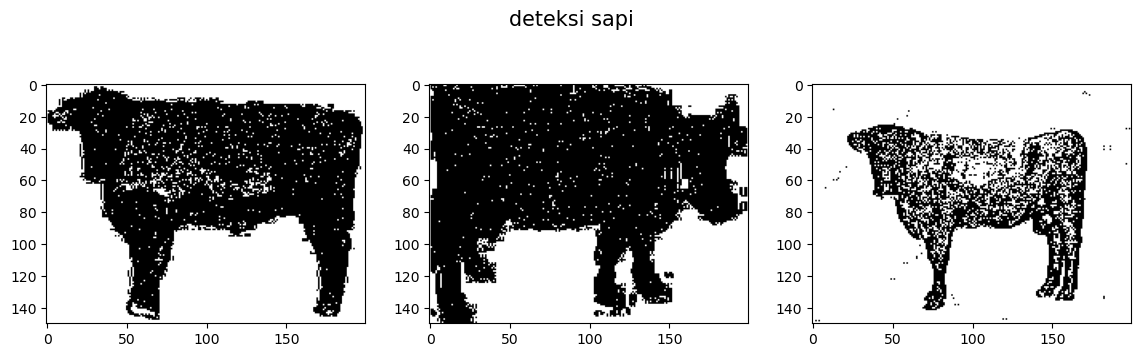

In [7]:
def calc_thresh(value, thresh):
    if value > thresh:
        return 0
    else:
        return 255

def calc_new_value(im, i, j, thresh):
    m, n = get_shape(im)
    h = 1

    if j == 0:
        a = im[i][j+1]  # Access the pixel value
        b = im[i][j+1]
        # forward
    elif j == n - 1:
        a = im[i][j-1]  # Access the pixel value
        b = im[i][j-1]
        # backward
    else:
        a = im[i][j+1]  # Access the pixel value
        b = im[i][j-1]
        h = 2

    return calc_thresh(abs(int(a[0]) - int(b[0])) / h, thresh)

def apply(im, low_thresh, high_thresh):
    new_im = [row[:] for row in im]
    for i in range(len(im)):
        for j in range(len(im[i])):
            value = calc_new_value(im, i, j, high_thresh)
            if value == 0:
                new_im[i][j] = 0
            elif value == 255:
                new_im[i][j] = calc_new_value(im, i, j, low_thresh)
    return new_im

fdif_image1 = apply(resized_image1, 0, 1)
fdif_image2 = apply(resized_image2, 0, 1)
fdif_image3 = apply(resized_image3, 6, 6)

display_im(fdif_image1, fdif_image2, fdif_image3, title='deteksi sapi')



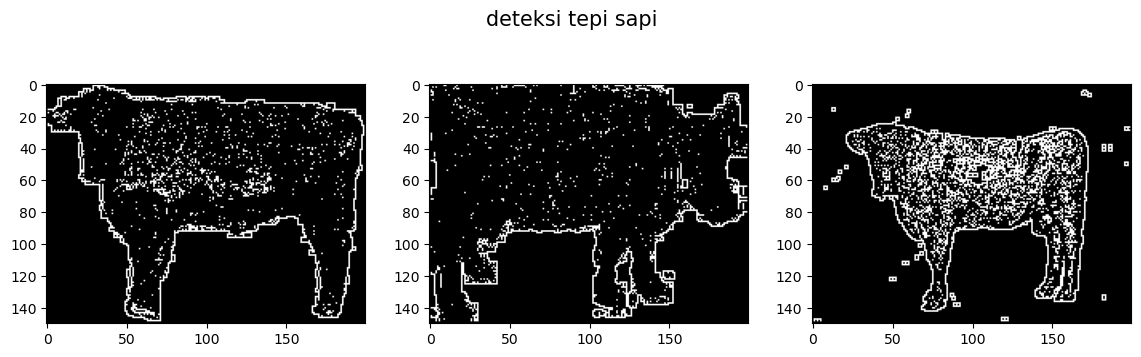

In [8]:
# 8-connectivity algorithm
def detect_edges(image):
    height, width = len(image), len(image[0])
    edges = [[0] * width for _ in range(height)]  # Initialize an empty edges image

    # Check the 8-connectivity of each pixel
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if image[i][j] == 255:  # Check if the pixel is filled
                if (
                    image[i - 1][j - 1] == 0
                    or image[i - 1][j] == 0
                    or image[i - 1][j + 1] == 0
                    or image[i][j - 1] == 0
                    or image[i][j + 1] == 0
                    or image[i + 1][j - 1] == 0
                    or image[i + 1][j] == 0
                    or image[i + 1][j + 1] == 0
                ):
                    edges[i][j] = 255  # Set the edge pixel to white

    return edges

detected_edges1 = detect_edges(fdif_image1)
detected_edges2 = detect_edges(fdif_image2)
detected_edges3 = detect_edges(fdif_image3)
display_im(detected_edges1, detected_edges2, detected_edges3, title='deteksi tepi sapi')

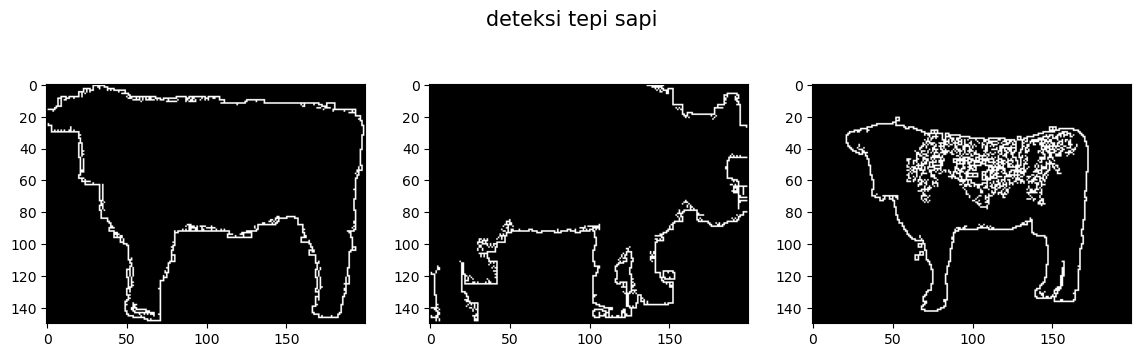

In [9]:
def connected_component_labeling(edges):
    height, width = len(edges), len(edges[0])
    visited = [[False] * width for _ in range(height)]
    components = []

    def dfs(i, j, component):
        if i < 0 or i >= height or j < 0 or j >= width:
            return
        if visited[i][j] or edges[i][j] != 255:
            return

        visited[i][j] = True
        component.append((i, j))

        # Explore the 8-connectivity neighbors
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                dfs(i + dx, j + dy, component)

    # Perform connected component labeling
    for i in range(height):
        for j in range(width):
            if not visited[i][j] and edges[i][j] == 255:
                component = []
                dfs(i, j, component)
                components.append(component)

    return components


def remove_disconnected_dots(edges, min_dot_size):
    components = connected_component_labeling(edges)

    # Remove small disconnected dots
    for component in components:
        if len(component) < min_dot_size:
            for i, j in component:
                edges[i][j] = 0

    return edges

undisconnected_dots1 = remove_disconnected_dots(detected_edges1, 40)
undisconnected_dots2 = remove_disconnected_dots(detected_edges2, 40)
undisconnected_dots3 = remove_disconnected_dots(detected_edges3, min_dot_size=125)
display_im(undisconnected_dots1, undisconnected_dots2, undisconnected_dots3, title='deteksi tepi sapi')

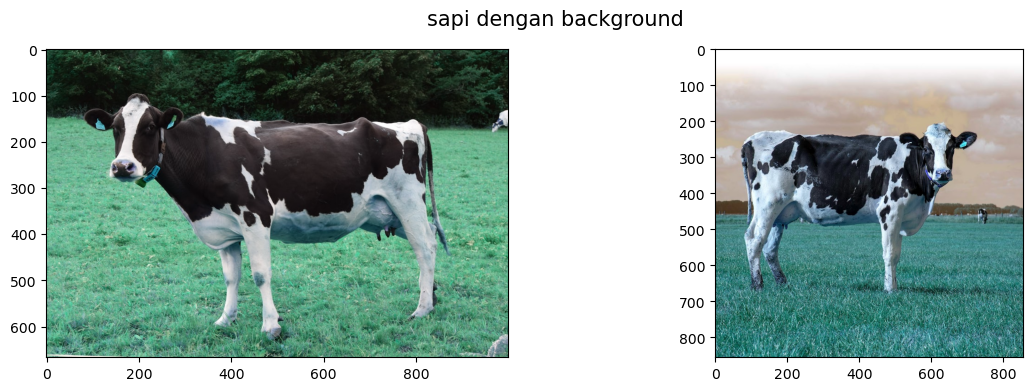

In [10]:
sapi_dgn_bg1 = cv2.imread('./sapi_x.jpeg')
sapi_dgn_bg2 = cv2.imread('./sapiy.jpg')

display_im2(sapi_dgn_bg1, sapi_dgn_bg2, title='sapi dengan background')

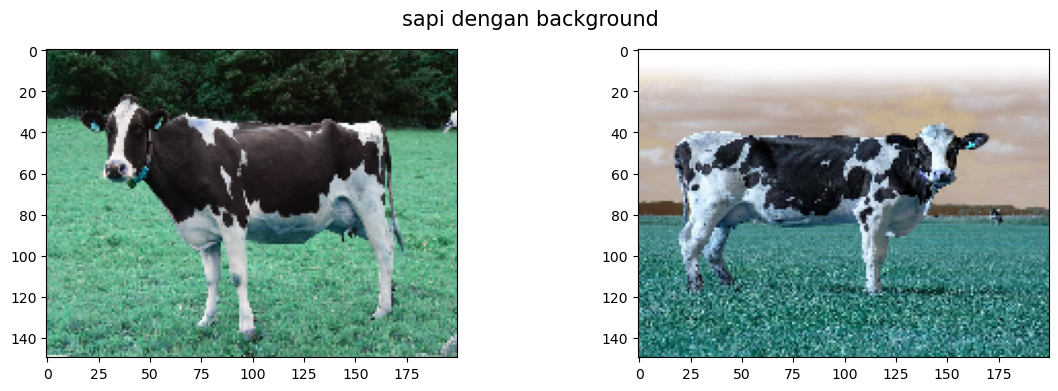

In [11]:
new_width = 200
new_height = 150

resized_image1 = resize_image(sapi_dgn_bg1, new_width, new_height)
resized_image2 = resize_image(sapi_dgn_bg2, new_width, new_height)

display_im2(resized_image1, resized_image2, title='sapi dengan background')

In [12]:
pattern = undisconnected_dots1
pattern2 = undisconnected_dots2
pattern3 = undisconnected_dots3

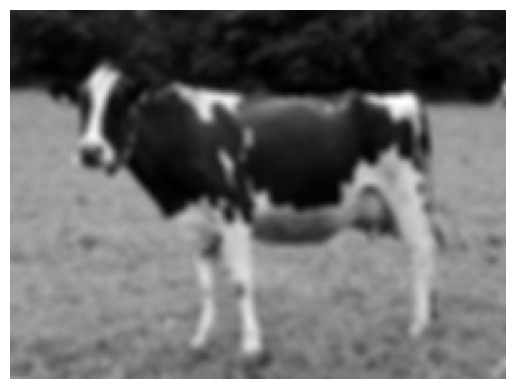

In [25]:
image = resized_image1 # Your image data

import math
# Convert the image to grayscale
gray_image = []
for row in image:
    gray_row = []
    for pixel in row:
        gray_value = int(pixel[0] * 0.299 + pixel[1] * 0.587 + pixel[2] * 0.114)
        gray_row.append(gray_value)
    gray_image.append(gray_row)

# Apply Gaussian blur for noise reduction
blurred_image = []
kernel_size = 5  # Adjust the kernel size as needed
sigma = 1.5  # Adjust the sigma value as needed
padding = kernel_size // 2

for i in range(padding, len(gray_image) - padding):
    blurred_row = []
    for j in range(padding, len(gray_image[i]) - padding):
        pixel_value = 0
        for x in range(-padding, padding + 1):
            for y in range(-padding, padding + 1):
                pixel_value += gray_image[i + x][j + y] * math.exp(-(x**2 + y**2) / (2 * sigma**2))
        blurred_row.append(pixel_value // (kernel_size**2))
    blurred_image.append(blurred_row)

# Adjust intensity levels
max_value = max(max(blurred_image))
min_value = min(min(blurred_image))

normalized_image = []
for row in blurred_image:
    normalized_row = []
    for pixel_value in row:
        normalized_value = int(255 * (pixel_value - min_value) / (max_value - min_value))
        normalized_row.append(normalized_value)
    normalized_image.append(normalized_row)

plt.imshow(normalized_image, cmap='gray')
plt.axis('off')
plt.show()

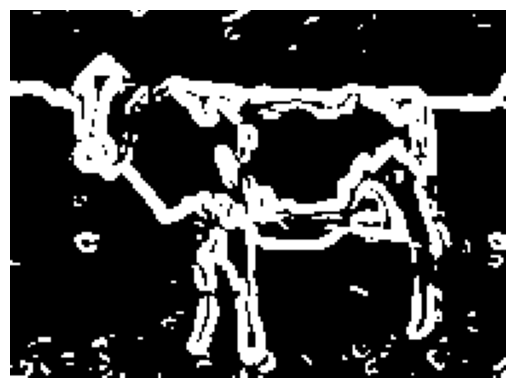

In [26]:
import matplotlib.pyplot as plt
import math

# Assuming you have the preprocessed image as `blurred_image`

blurred_image = normalized_image
# Perform Sobel filtering for edge detection
gradient_x = []
gradient_y = []
sobel_threshold = 100  # Adjust the threshold value as needed

for i in range(1, len(blurred_image) - 1):
    gradient_row_x = []
    gradient_row_y = []
    for j in range(1, len(blurred_image[i]) - 1):
        gx = (blurred_image[i + 1][j - 1] + 2 * blurred_image[i + 1][j] + blurred_image[i + 1][j + 1]) - \
             (blurred_image[i - 1][j - 1] + 2 * blurred_image[i - 1][j] + blurred_image[i - 1][j + 1])
        gy = (blurred_image[i - 1][j + 1] + 2 * blurred_image[i][j + 1] + blurred_image[i + 1][j + 1]) - \
             (blurred_image[i - 1][j - 1] + 2 * blurred_image[i][j - 1] + blurred_image[i + 1][j - 1])
        gradient_row_x.append(gx)
        gradient_row_y.append(gy)
    gradient_x.append(gradient_row_x)
    gradient_y.append(gradient_row_y)

# Calculate edge magnitude
edge_magnitude = []
for i in range(len(gradient_x)):
    magnitude_row = []
    for j in range(len(gradient_x[i])):
        magnitude = math.sqrt(gradient_x[i][j]**2 + gradient_y[i][j]**2)
        magnitude_row.append(magnitude)
    edge_magnitude.append(magnitude_row)

# Apply thresholding to extract strong edges
canny_edges = []
for i in range(len(edge_magnitude)):
    edges_row = []
    for j in range(len(edge_magnitude[i])):
        if edge_magnitude[i][j] >= sobel_threshold:
            edges_row.append(255)
        else:
            edges_row.append(0)
    canny_edges.append(edges_row)

# Display the edges
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.show()
